## Projeto da UC Análises Descritivas e Modelos Analíticos para problemas de negócios

Como um bom brasileiro você provavelmente já viu algum anúncio da Trivago, Booking.com, Decolar entre outros. Com o aumento do uso da tecnologia para todos os afazeres diários, estes sites de reservas onlines vem sendo utilizados cada vez mais, proporcionando melhores experiências e preços para seus clientes.

Esta nova cultura de reserva de hotéis mudou de forma drástica as possibilidades de se reservar um hotel e o comportamento dos clientes. Da mesma forma que a tecnologia facilita a vida das pessoas e fornece boas experiências, também temos o lado negativo da tecnologia, no nosso caso de estudo, iremos abordar sobre as taxas e a facilidade do cancelamento/não comparecimento das reservas, as quais possuem diversos motivos para ocorrerem.

Com este problema de negócio em mente, utilizaremos Machine Learning para **prever se um cliente irá cancelar ou preservar sua reserva de hotel!**

**Curso:** Ciência de Dados<br>
**Universidade:** UAM - Anhembi Morumbi<br>
**Nome:** Murillo Moura

### Introdução

**Sobre nosso dataset:** Este arquivo possui diferentes atributos de detalhes de reservas de clientes. 

**Dicionário de Dados:**

* Booking_ID: Identificador único da reserva.
* no_of_adults: Número de Adultos.
* no_of_children: Número de Crianças.
* no_of_weekend_nights: Número de noites de final de semana que o hóspede ficou ou reservou.
* no_of_week_nights: Número de dias da semana que o hóspede ficou ou reservou.
* type_of_meal_plan: Tipo de refeição escolhido pelo cliente.
* required_car_parking_space: O cliente requer estacionamento no hotel? (0 - Não, 1- Sim)
* room_type_reserved: Tipo de quarto reservado pelo cliente.
* lead_time: Número de dias entre a data da reserva e a data de chegada da reserva.
* arrival_year: Ano de chegada no hotel.
* arrival_month: Mês de chegada no hotel.
* arrival_date: Data do mês.
* market_segment_type: Designação da Segmentação de Mercado.
* repeated_guest: O cliente já faz alguma reserva antes? (0 - Não, 1- Sim)
* no_of_previous_cancellations: Número de reservas prévias que foram canceladas pelo cliente antes da reserva atual.
* no_of_previous_bookings_not_canceled: Número de reservas anteriores não canceladas pelo cliente antes da reserva atual.
* avg_price_per_room: Preço médio por dia da reserva (em euros)
* no_of_special_requests: Número total de pedidos especiais feito pelo cliente.(Ex: Andar alto, vista do quarto etc.)
* booking_status: Campo indicando se o cliente cancelou ou não. (0 - Não | 1 - Sim)

In [1]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from scipy.stats import loguniform
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carregamento dos dados

df = pd.read_csv('./hotel_reservations.csv')

In [3]:
# Nome Original Colunas

df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
colunas_traduzidas = {'Booking_ID': 'id_reserva',
                      'no_of_adults' : 'num_adultos',
                      'no_of_children': 'num_criancas',
                      'no_of_weekend_nights':'num_dias_finalsemana',
                      'no_of_week_nights' : 'num_dias_semana',
                      'type_of_meal_plan':'tipo_refeicao',
                      'required_car_parking_space':'requer_estacionamento',
                      'room_type_reserved': 'tipo_quarto_reservado',
                      'lead_time': 'num_dias_reserva_chegada',
                      'arrival_year' : 'ano_chegada',
                      'arrival_month': 'mes_chegada',
                      'arrival_date': 'dia_chegada',
                      'market_segment_type': 'tipo_segmentacao_mercado',
                      'repeated_guest' : 'cliente_recorrente',
                      'no_of_previous_cancellations': 'num_reservas_canceladas',
                      'no_of_previous_bookings_not_canceled': 'num_reservas_naocancelados',
                      'avg_price_per_room': 'preco_medio_quarto',
                      'no_of_special_requests': 'num_pedidos_especiais',
                      'booking_status' : 'cancelado'
                     }

df.rename(columns= colunas_traduzidas, inplace = True)

In [5]:
# Colunas traduzidas

df.columns

Index(['id_reserva', 'num_adultos', 'num_criancas', 'num_dias_finalsemana',
       'num_dias_semana', 'tipo_refeicao', 'requer_estacionamento',
       'tipo_quarto_reservado', 'num_dias_reserva_chegada', 'ano_chegada',
       'mes_chegada', 'dia_chegada', 'tipo_segmentacao_mercado',
       'cliente_recorrente', 'num_reservas_canceladas',
       'num_reservas_naocancelados', 'preco_medio_quarto',
       'num_pedidos_especiais', 'cancelado'],
      dtype='object')

### EDA - Análise Exploratória de Dados

In [6]:
df.head(5)

,id_reserva,num_adultos,num_criancas,num_dias_finalsemana,num_dias_semana,tipo_refeicao,requer_estacionamento,tipo_quarto_reservado,num_dias_reserva_chegada,ano_chegada,mes_chegada,dia_chegada,tipo_segmentacao_mercado,cliente_recorrente,num_reservas_canceladas,num_reservas_naocancelados,preco_medio_quarto,num_pedidos_especiais,cancelado
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
# Tamanho de nosso dataset

print(f"Temos {df.shape[0]:,} linhas e {df.shape[1]} colunas em nosso dataset.")

Temos 36,275 linhas e 19 colunas em nosso dataset.


In [8]:
# Informações Gerais (Verificação de Valores não nulos & Tipos de dados)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_reserva                  36275 non-null  object 
 1   num_adultos                 36275 non-null  int64  
 2   num_criancas                36275 non-null  int64  
 3   num_dias_finalsemana        36275 non-null  int64  
 4   num_dias_semana             36275 non-null  int64  
 5   tipo_refeicao               36275 non-null  object 
 6   requer_estacionamento       36275 non-null  int64  
 7   tipo_quarto_reservado       36275 non-null  object 
 8   num_dias_reserva_chegada    36275 non-null  int64  
 9   ano_chegada                 36275 non-null  int64  
 10  mes_chegada                 36275 non-null  int64  
 11  dia_chegada                 36275 non-null  int64  
 12  tipo_segmentacao_mercado    36275 non-null  object 
 13  cliente_recorrente          362

In [9]:
# Não possuímos valores duplicados no nosso dataset

df[df.duplicated()]

,id_reserva,num_adultos,num_criancas,num_dias_finalsemana,num_dias_semana,tipo_refeicao,requer_estacionamento,tipo_quarto_reservado,num_dias_reserva_chegada,ano_chegada,mes_chegada,dia_chegada,tipo_segmentacao_mercado,cliente_recorrente,num_reservas_canceladas,num_reservas_naocancelados,preco_medio_quarto,num_pedidos_especiais,cancelado


In [10]:
# Não possuímos dados ausentes em nosso dataset

df.isnull().sum()

id_reserva                    0
num_adultos                   0
num_criancas                  0
num_dias_finalsemana          0
num_dias_semana               0
tipo_refeicao                 0
requer_estacionamento         0
tipo_quarto_reservado         0
num_dias_reserva_chegada      0
ano_chegada                   0
mes_chegada                   0
dia_chegada                   0
tipo_segmentacao_mercado      0
cliente_recorrente            0
num_reservas_canceladas       0
num_reservas_naocancelados    0
preco_medio_quarto            0
num_pedidos_especiais         0
cancelado                     0
dtype: int64

In [11]:
df.describe()

,num_adultos,num_criancas,num_dias_finalsemana,num_dias_semana,requer_estacionamento,num_dias_reserva_chegada,ano_chegada,mes_chegada,dia_chegada,cliente_recorrente,num_reservas_canceladas,num_reservas_naocancelados,preco_medio_quarto,num_pedidos_especiais
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


#### OBS: Ao analisar os dados acima, podemos verificar que existem reservas cujo o número de adultos é igual a zero "0". Partindo do pressuposto que não temos os dados de quem fez a reserva, nem de qual a idade mínima permitida do país (para fazer reservas). Tomamos a decisão de retirar os dados cujo o número de adultos é igual à zero "0". (Já que não representam uma expressividade grande em nosso dataset)

In [12]:
print(f"{df[df.num_adultos == 0].shape[0]} de {df.shape[0]}. Representatividade de: {round((df[df.num_adultos == 0].shape[0]/df.shape[0]) * 100, 2)}% dos nosso dados")

139 de 36275. Representatividade de: 0.38% dos nosso dados


In [13]:
df = df[df.num_adultos != 0]

#### Como iremos utilizar Regressão Logística nesta atividade, com o objetivo de aumentar a acurácia de nosso modelo, irei retirar as linhas cujo valor médio dos quartos é igual a zero, partindo do pressuposto de que não há como realizar reservas de graça (Sabemos que temos como acumular créditos ou até mesmo milhas, mas nosso modelo não sabe, por esta razão iremos retirá-lo)

In [14]:
df = df[df.preco_medio_quarto != 0]

### Transformação de variáveis em outra escala

In [15]:
# Calcular amplitude das nossas variáveis numéricas

for col in df.select_dtypes(['number']).columns:
    print(f"{col} - Amplitude: {df[col].max() - df[col].min()}")

num_adultos - Amplitude: 3
num_criancas - Amplitude: 10
num_dias_finalsemana - Amplitude: 7
num_dias_semana - Amplitude: 17
requer_estacionamento - Amplitude: 1
num_dias_reserva_chegada - Amplitude: 443
ano_chegada - Amplitude: 1
mes_chegada - Amplitude: 11
dia_chegada - Amplitude: 30
cliente_recorrente - Amplitude: 1
num_reservas_canceladas - Amplitude: 13
num_reservas_naocancelados - Amplitude: 58
preco_medio_quarto - Amplitude: 539.5
num_pedidos_especiais - Amplitude: 5


Somente duas variáveis apresentam grandes amplitudes: _"num_dias_reserva_chegada"_ e _"preco_medio_quarto"_, visando o melhor desempenho e acurácia do modelo decido por não realizar nenhum tipo de agrupamento, já que estas variáveis serão importantes para a predição do nosso modelo.

## Codificação de Variáveis Categóricas

**Label Enconding -** Mantém a coluna e atribui um valor para cada uma das categorias.<br>
_(**Ponto Negativo:** O modelo escolhe de forma arbitrária como classificar cada uma das categorias, portanto é necessário um estudo mais preciso de correlação e assim, atribuir valores mais fidedignos.)_

**OHE -** Cria colunas adicionais, atribuindo um valor binário (1 - Sim | 0 - Não) se o atributo é verdadeiro para aquele registro.<br>
_(**Ponto Negativo:** Aumenta a multicolinearidade portanto, precisaremos excluir uma coluna para diminuir a dimensionalidade e multicolinearidade)_

_**Fonte:** https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/_

In [16]:
# Quanto maior o tipo de refeição, maior o preço médio do quarto

pd.pivot_table(df,
               values = 'preco_medio_quarto',
               index = 'tipo_refeicao',
               aggfunc = 'mean').reset_index().sort_values('preco_medio_quarto', ascending = False)

,tipo_refeicao,preco_medio_quarto
2,Meal Plan 3,206.000000
1,Meal Plan 2,117.455080
0,Meal Plan 1,105.395608
3,Not Selected,95.504349


In [17]:
# Quanto maior o tipo do quarto, maior o preço médio.

pd.pivot_table(df,
               values = 'preco_medio_quarto',
               index = 'tipo_quarto_reservado',
               aggfunc = 'mean').reset_index().sort_values('preco_medio_quarto', ascending = False)

,tipo_quarto_reservado,preco_medio_quarto
6,Room_Type 7,207.807881
5,Room_Type 6,185.646624
4,Room_Type 5,132.215363
3,Room_Type 4,126.477547
2,Room_Type 3,103.150000
0,Room_Type 1,97.264866
1,Room_Type 2,92.435121


### Análise das colunas categóricas:

* **id_reserva -** Esta coluna não possui nenhuma representatividade em nosso dataset, portanto iremos excluí-la. _(Excluir)_
* **tipo_refeicao -** Podemos analisar que se trata de uma variável qualitativa ordinal, pois possuímos tipos de refeições mais caras que outras, o que impacta no preço médio dos quartos. _(Label Encoding)_
* **tipo_quarto_reservado -** Esta variável também se trata de uma variável qualitativa ordinal, pois os tipos de quartos impactam no preço médio dos quartos. _(Label Encoding)_
* **tipo_segmentacao_mercado -** Por se tratar de uma variável qualitativa nominal (Não possui hierarquia entre as categorias) iremos utilizar o OHE _(One Hot Encoding)_
* **cancelado -** Substituíremos os valores por valores binários, por se tratar de um modelo de Regressão Logística Binário (1 | 0) 

In [18]:
# Valor únicos de todas colunas de texto no dataset

for col in df.select_dtypes('object').columns:
    print(col)
    print(df[col].unique())
    print("-"*50)

id_reserva
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
--------------------------------------------------
tipo_refeicao
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
--------------------------------------------------
tipo_quarto_reservado
['Room_Type 1' 'Room_Type 4' 'Room_Type 6' 'Room_Type 5' 'Room_Type 2'
 'Room_Type 7' 'Room_Type 3']
--------------------------------------------------
tipo_segmentacao_mercado
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
--------------------------------------------------
cancelado
['Not_Canceled' 'Canceled']
--------------------------------------------------


In [19]:
# Exclusão da coluna 'id_reserva'

df.drop('id_reserva', axis = 1, inplace = True)

In [20]:
df.tipo_refeicao.replace({'Not Selected': 0,
                          'Meal Plan 1': 1,
                          'Meal Plan 2': 2,
                          'Meal Plan 3': 3}, inplace = True)

In [21]:
df.tipo_quarto_reservado.replace({'Room_Type 1': 1,
                                  'Room_Type 2': 2,
                                  'Room_Type 3': 3,
                                  'Room_Type 4': 4,
                                  'Room_Type 5': 5,
                                  'Room_Type 6': 6,
                                  'Room_Type 7': 7}, inplace = True)

In [22]:
df.cancelado.replace({'Not_Canceled': 0,
                      'Canceled': 1}, inplace = True)

#### One Hot Encoder (tipo_segmentacao_mercado)

In [23]:
ohe = OneHotEncoder(sparse_output = False, dtype = 'int')

ohe_seg_mercado = ohe.fit_transform(df[['tipo_segmentacao_mercado']])

encoded_seg_mercado_df = pd.DataFrame(ohe_seg_mercado, columns = ohe.get_feature_names_out(['tipo_segmentacao_mercado']))

Concatenação dos dois dataframes.<br>
(Já deleto a coluna que aplicamos o OHE e deleto mais uma coluna resultante do OHE para diminuir a multicolinearidade.)

In [24]:
df = pd.concat([df.drop(columns = 'tipo_segmentacao_mercado').reset_index(drop = True),
                encoded_seg_mercado_df.drop(columns = 'tipo_segmentacao_mercado_Aviation')], axis = 1)

In [25]:
df.head()

,num_adultos,num_criancas,num_dias_finalsemana,num_dias_semana,tipo_refeicao,requer_estacionamento,tipo_quarto_reservado,num_dias_reserva_chegada,ano_chegada,mes_chegada,...,cliente_recorrente,num_reservas_canceladas,num_reservas_naocancelados,preco_medio_quarto,num_pedidos_especiais,cancelado,tipo_segmentacao_mercado_Complementary,tipo_segmentacao_mercado_Corporate,tipo_segmentacao_mercado_Offline,tipo_segmentacao_mercado_Online
0,2,0,1,2,1,0,1,224,2017,10,...,0,0,0,65.00,0,0,0,0,1,0
1,2,0,2,3,0,0,1,5,2018,11,...,0,0,0,106.68,1,0,0,0,0,1
2,1,0,2,1,1,0,1,1,2018,2,...,0,0,0,60.00,0,1,0,0,0,1
3,2,0,0,2,1,0,1,211,2018,5,...,0,0,0,100.00,0,1,0,0,0,1
4,2,0,1,1,0,0,1,48,2018,4,...,0,0,0,94.50,0,1,0,0,0,1


### Tratamento das variáveis com alta correlação

De acordo com a análise abaixo iremos verificar se temos variáveis com correlações positivas ou negativas acima de 0,5.

**Ex:** Se três varíaveis possuem uma correlação muito forte, mantenho somente uma delas, aquela que tenho mais interesse.

**Razão:** <i>"O uso de preditores altamente correlacionados em técnicas como regressão linear pode resultar em modelos altamente instáveis, erros numéricos e desempenho de previsão muito ruim."</i>

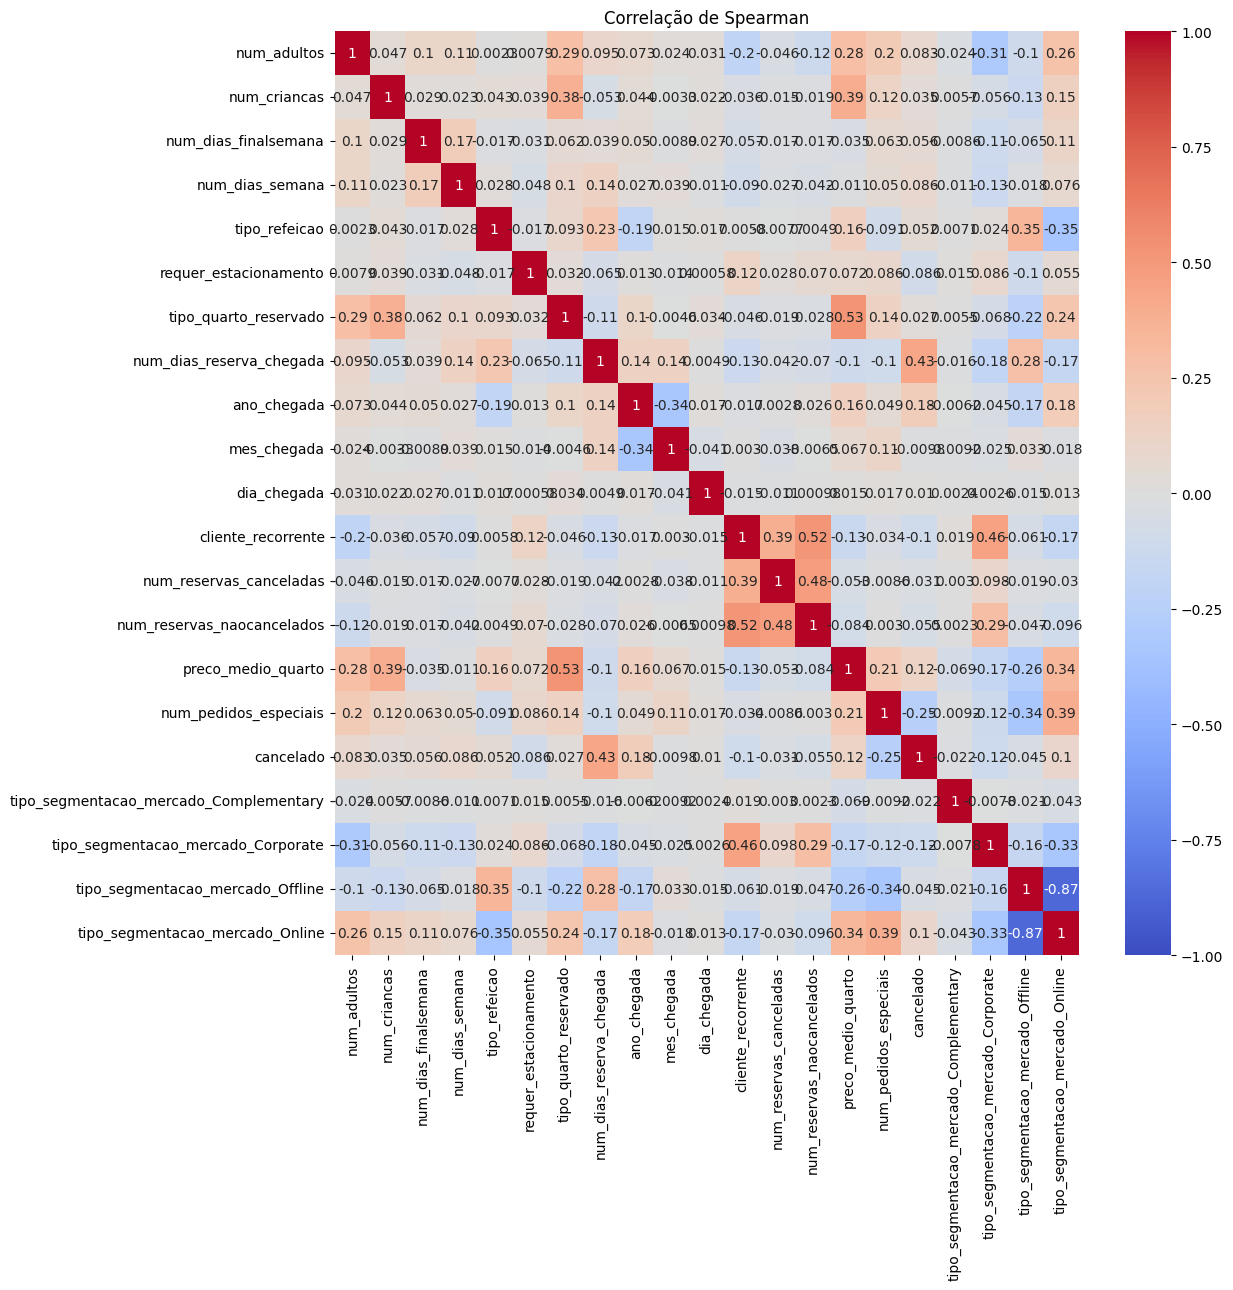

In [26]:
correlacao_pearson = df.corr(method='pearson')

plt.figure(figsize=(12,12))
sns.heatmap(correlacao_pearson, annot=True,cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title('Correlação de Spearman')
plt.show()

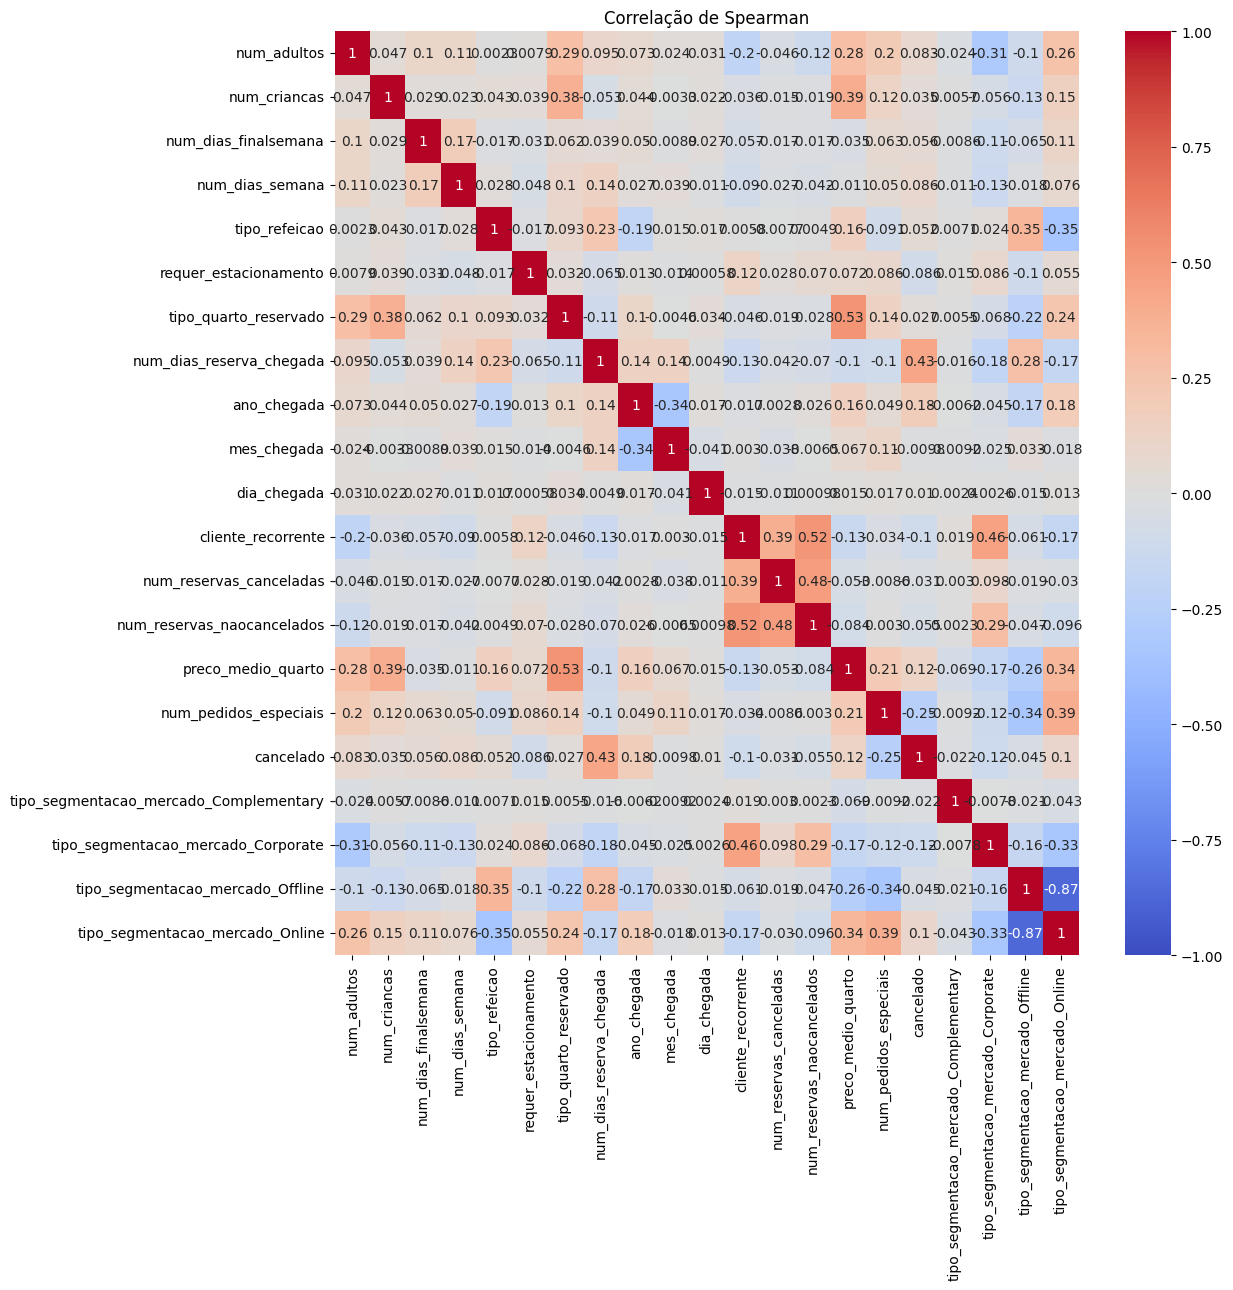

In [27]:
correlacao_spearman = df.corr(method='spearman')

plt.figure(figsize=(12,12))
sns.heatmap(correlacao_pearson, annot=True,cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title('Correlação de Spearman')
plt.show()

Podemos verificar que as variável 'tipo_segmentacao_mercado_Online' e 'tipo_segmentacao_mercado_Offline' apresentam um valor de correlação altíssimo de -0,87, por este motivo irei retirár uma delas para que a correlação permaneça baixa. 

In [28]:
df.drop('tipo_segmentacao_mercado_Offline', axis = 1, inplace = True)

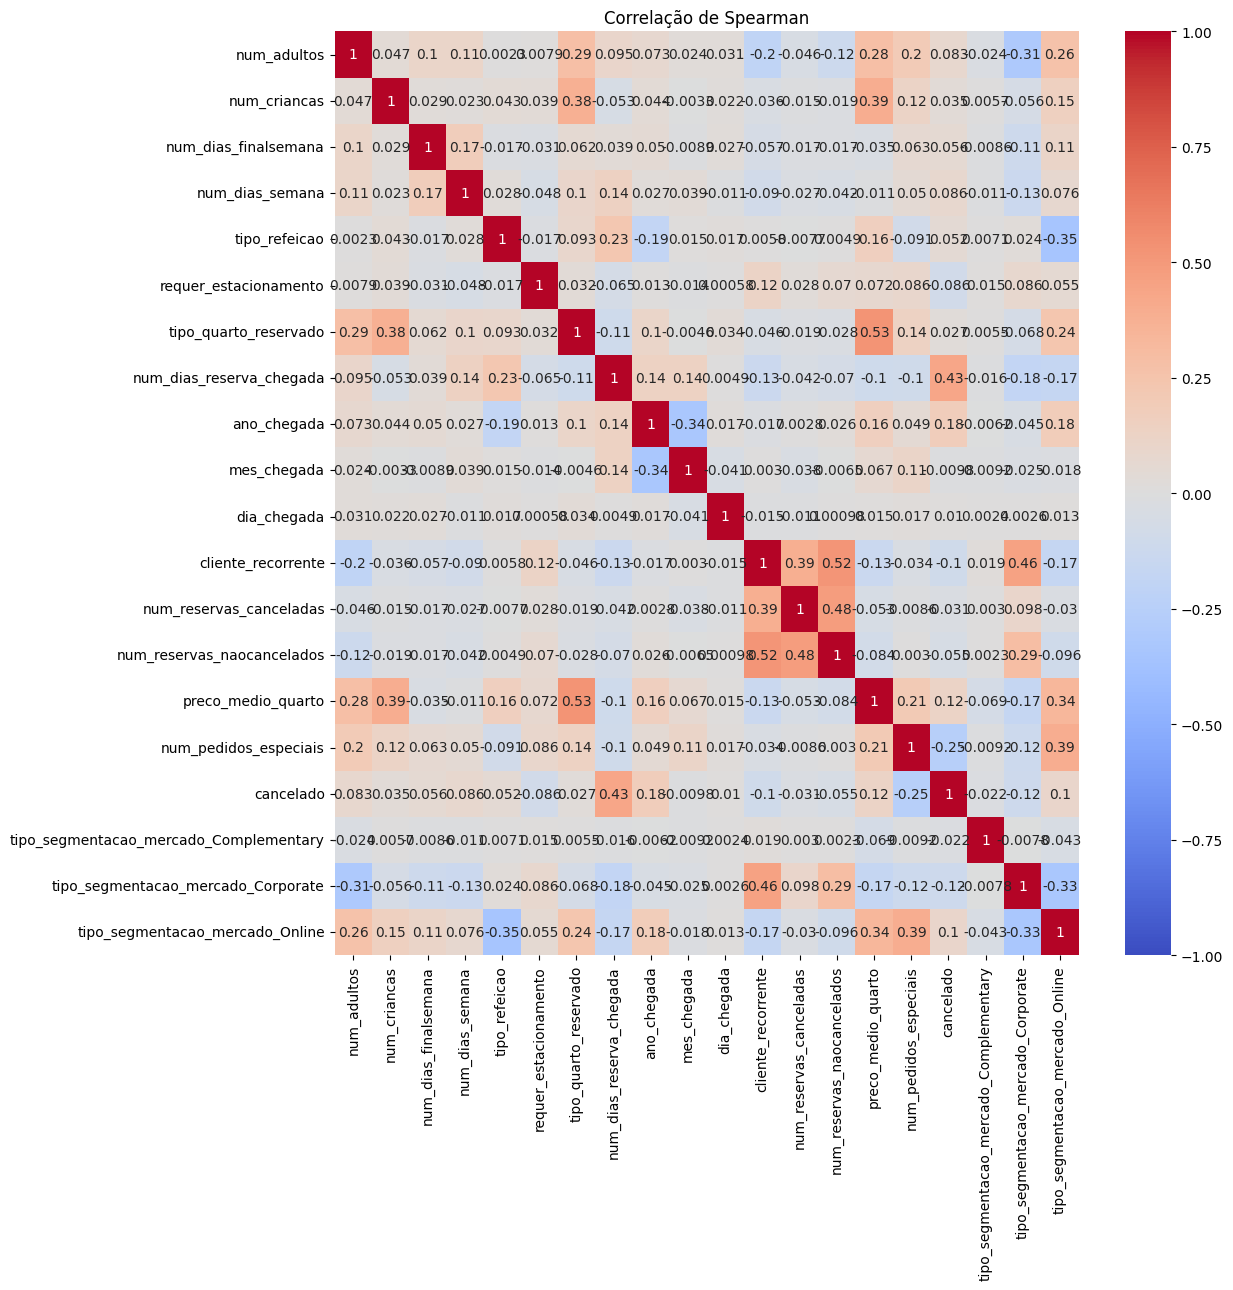

In [29]:
correlacao_pearson = df.corr(method='pearson')

plt.figure(figsize=(12,12))
sns.heatmap(correlacao_pearson, annot=True,cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title('Correlação de Spearman')
plt.show()

Como esperado nossos valores de correlação estão abaixo de 0.53. Podemos encontrar algumas correlações de 0,52 e 0,53, por conta do tamanho do nosso dataset tomo a decisão de mantê-lás.

### Aplicação do ppscore

In [30]:
import ppscore as pps 

matriz_pps = pps.matrix(df)

In [31]:
#Filtrando a matriz ppscore na qual as variáveis não se predizem e o valor do ppscore é maior ou igual a 0.1

matriz_pps[(~matriz_pps.metric.isna()) & (matriz_pps.ppscore >= 0.1)].sort_values('ppscore', ascending = False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
271,num_reservas_naocancelados,cliente_recorrente,0.841877,regression,True,mean absolute error,0.020200,0.003194,DecisionTreeRegressor()
299,preco_medio_quarto,tipo_segmentacao_mercado_Online,0.381330,regression,True,mean absolute error,0.361800,0.223835,DecisionTreeRegressor()
286,preco_medio_quarto,tipo_quarto_reservado,0.169392,regression,True,mean absolute error,0.696800,0.578768,DecisionTreeRegressor()
134,tipo_quarto_reservado,preco_medio_quarto,0.161842,regression,True,mean absolute error,25.079644,21.020698,DecisionTreeRegressor()
287,preco_medio_quarto,num_dias_reserva_chegada,0.129711,regression,True,mean absolute error,64.760000,56.359918,DecisionTreeRegressor()
395,tipo_segmentacao_mercado_Online,num_pedidos_especiais,0.109483,regression,True,mean absolute error,0.623000,0.554792,DecisionTreeRegressor()


In [32]:
#Selecionando somente as variáveis do resultado anterior

matriz_pps[(~matriz_pps.metric.isna()) & (matriz_pps.ppscore >= 0.1)].sort_values('ppscore', ascending = False).x.tolist()

['num_reservas_naocancelados',
 'preco_medio_quarto',
 'preco_medio_quarto',
 'tipo_quarto_reservado',
 'preco_medio_quarto',
 'tipo_segmentacao_mercado_Online']

De acordo com o ppscore estas seriam as melhores variáveis a serem mantidas em nosso dataset, porém como já possuímos poucas colunas decido por manter as já existentes.

### Separação do X e y

In [33]:
X = df.drop('cancelado', axis = 1)
y = df[['cancelado']]

### Balanceamento da Variável Alvo

Nossa classe alvo epresenta somente 33% dos dados, portanto utilizaremos o SMOTE para fazer um OverSampling dos dados.

In [34]:
round(y.cancelado.value_counts(normalize = True) * 100, 2)

cancelado
0    66.75
1    33.25
Name: proportion, dtype: float64

In [35]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [36]:
y_smote.value_counts()

cancelado
0            23760
1            23760
Name: count, dtype: int64

### Separação dos dados em treino e teste

In [37]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

### Normalização das variáveis

In [38]:
norm = Normalizer()

In [39]:
X_treino_norm = norm.fit_transform(X_treino)
X_teste_norm = norm.transform(X_teste)

### Técnica de Hiperparametrização Automática com o RandomizedSearchCV

In [40]:
# Definindo o espaço de hiperparâmetros
param_distributions = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': loguniform(1e-5, 1e2),
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # Incluindo l1_ratio para elasticnet
}

# Criar o modelo de Regressão Logística
model = LogisticRegression(max_iter=100, random_state=42)

# Criar o objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter= 100,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Ajustar (fit) o modelo
random_search.fit(X_treino_norm, y_treino)

# Melhor conjunto de hiperparâmetros
print('Melhores hiperparâmetros:', random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores hiperparâmetros: {'C': 15.081842541532026, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}


### Avaliação com a Acurácia do modelo aplicando os melhores hiperparâmetros

In [41]:
# Treinar o modelo final com os melhores hiperparâmetros
melhor_modelo = random_search.best_estimator_

# Avaliar no conjunto de teste
acuracia = melhor_modelo.score(X_teste_norm, y_teste)
print('Acurácia no conjunto de teste:', round(acuracia * 100, 2))

Acurácia no conjunto de teste: 78.85


### Visualização/Avaliação do Modelo | Classificação: Matriz de Confusão 


In [42]:
y_pred = melhor_modelo.predict(X_teste_norm)

In [46]:
cf_matrix = confusion_matrix(y_pred, y_teste)

<function matplotlib.pyplot.show(close=None, block=None)>

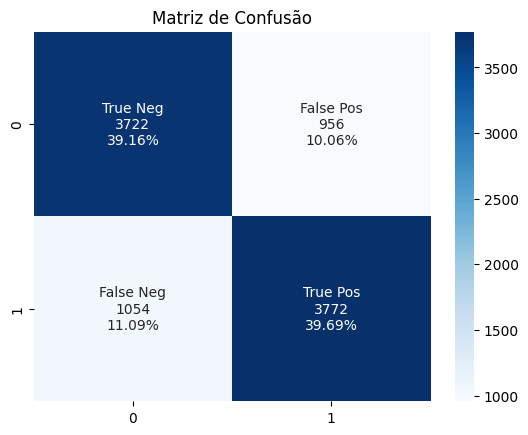

In [48]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
                       
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.title('Matriz de Confusão')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show

Fonte código Confusion Matrix: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

### Conclusão

Nosso modelo de Regressão Logística conseguiu prever com sucesso quase 80% dos nossos dados de teste. Sem dúvidas todo o processo realizado durante cada etapa foi primordial para que conseguíssemos este ótimo resultado. Neste caso de negócio, a aplicação da Aprendizagem de Máquina em uma rede de hotéis, por exemplo, poderia trazer ótimas oportunidades de insights, para que como consequência, os responsáveis da empresa pudessem tomar uma ação de como prosseguir com a empresa através destes insights e predições extraídas com nosso modelo.